# Course: Intro to Python & R for Data Analysis
## Lecture: Becoming a Viz Kid

Data Structures & API

Professor: Mary Kaltenberg

Fall 2020

contact: mkaltenberg@pace.edu

About me: www.mkaltenberg.com

## We got data, now how do we visualize it?

There are many graphing packages out there, but the most popular one is matplotlib.

I also find seaborn more intuitive, and frankly, prettier.  

So, we'll go over both in this lecture. 


<img src="https://media.giphy.com/media/xT5LMDYj4kvKNlGDHq/giphy.gif" width = 300>

### Matplotlib

In [3]:
import matplotlib.pyplot as plt #here is the matplotlib package that we will use
import pandas as pd

In [5]:
path = '/Users/mkaltenberg/Documents/Data Analysis Python R Lectures/Data_Analysis_Python_R/Lecture 8/'

# First, we import our data into a dataframe
# we'll be using data about walmart store openings
walmart = pd.read_csv(path+'1962_2006_walmart_store_openings.csv')

### Line Graphs

In [42]:
# let's start with a line graph of the number of stores opening over time (in total)
#first we must calculate this information
store_time = walmart[['YEAR','storenum']].drop_duplicates().groupby('YEAR').count().reset_index()

line graphs use the function called plot from matplotlib. It's the easiest of all of the graphing capabilities in python

``` python
plt.plot(x,y)
```
you enter your x axis information first then your y axis information 


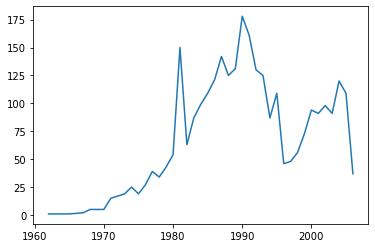

In [43]:
plt.plot(store_time['YEAR'],store_time['storenum'])

# you're first graph in python - that was easy!

Let's add some information to this graph because you should **ALWAYS ALWAYS ALWAYS** include (read that as points off if I don't see this in your project):
- x-axis title
- y-axis title
- graph title
- legend (where applicable)

90% of the work in graphing in python is getting these items the way you want them to look. 


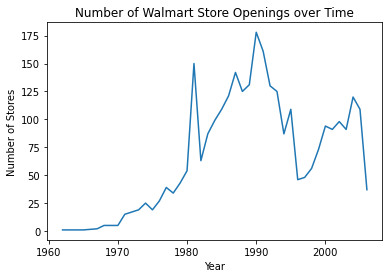

In [44]:
plt.plot(store_time['YEAR'],store_time['storenum'])
plt.xlabel('Year')
plt.ylabel('Number of Stores')
plt.title("Number of Walmart Store Openings over Time")
plt.show()  # This function is to display your graph (it's easier to always include it as the last line in your code) 

### Let's spice it up

What if you want to get the number of walmart store openings over time by state? Sometimes this is called a spaghetti graph


In [45]:
store_time_state = walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()

Text(0, 0.5, 'Number of Stores')

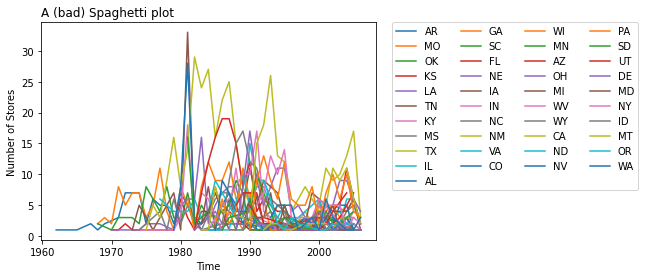

In [46]:
states = store_time_state['STRSTATE'].unique()

#We are adding a line to the plot for each state
#What this does is plot the line for each state then adds it to the plotting area.
for s in states:
    state_store = store_time_state[(store_time_state['STRSTATE']==str(s))]
    plt.plot(state_store['YEAR'],state_store['storenum'], label=s)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=4)
# very specific information about where I want the legend to be (more on this next time)

# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0) #more detailed options! yay!
plt.xlabel("Time")
plt.ylabel("Number of Stores")

Text(0, 0.5, 'Number of Stores')

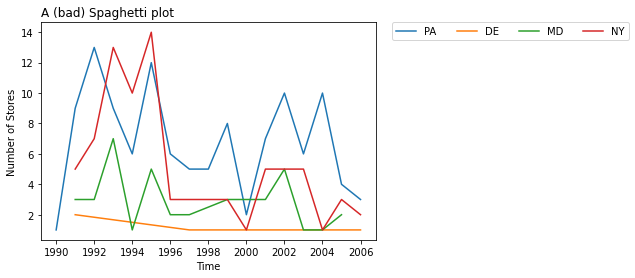

In [106]:
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')]

store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()
states = store_time_state['STRSTATE'].unique()

#We are adding a line to the plot for each state
#What this does is plot the line for each state then adds it to the plotting area.
for s in states:
    state_store = store_time_state[(store_time_state['STRSTATE']==str(s))]
    plt.plot(state_store['YEAR'],state_store['storenum'], label=s)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=4)
# very specific information about where I want the legend to be (more on this next time)

# Add titles
plt.title("A better Spaghetti plot", loc='left', fontsize=12, fontweight=0) #more detailed options! yay!
plt.xlabel("Time")
plt.ylabel("Number of Stores")

## Bar Graphs

In [39]:
# let's find out the total number of super centers compared to wal-mart stores in NY
ny_walmart = walmart[(walmart['STRSTATE'] == 'NY')]

In [49]:
ny_walmart[['type_store','storenum']].drop_duplicates().groupby('type_store').count().reset_index()

,type_store,storenum
0,Supercenter,35
1,Wal-Mart,48


Text(0, 0.5, 'Number of Stores')

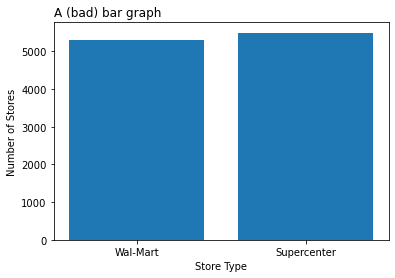

In [51]:
plt.bar(ny_walmart['type_store'], ny_walmart['storenum'])
plt.title("A (bad) bar graph", loc='left', fontsize=12, fontweight=0) #more detailed options! yay!
plt.xlabel("Store Type")
plt.ylabel("Number of Stores")

In [116]:
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')]
select_walmart = select_walmart[['type_store','storenum', 'STRSTATE']].drop_duplicates().groupby(['type_store', 'STRSTATE']).count().reset_index()

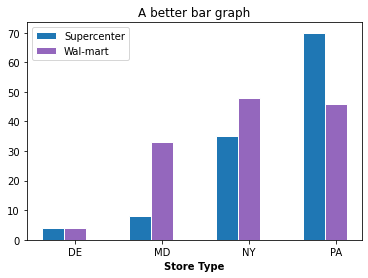

In [119]:
import numpy as np

s_bar = select_walmart['storenum'][select_walmart['type_store']=='Supercenter']
w_bar = select_walmart['storenum'][select_walmart['type_store']=='Wal-Mart']

barWidth = 0.25

r1 = np.arange(len(s_bar))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, s_bar, color='tab:blue', width=barWidth, edgecolor='white', label='Supercenter')
plt.bar(r2, w_bar, color='tab:purple', width=barWidth, edgecolor='white', label='Wal-mart')
 
# Add xticks on the middle of the group bars
plt.xlabel('Store Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(s_bar))], ['DE', 'MD', 'NY', 'PA'])
plt.title("A better bar graph")
 
# # Create legend & Show graphic
plt.legend()
plt.show()

A great source of colors is in the documentation for matplotlib
- [Here are some pallettes that you can use, too](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)
- [Here are named colors you can use](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

### Scatter plots

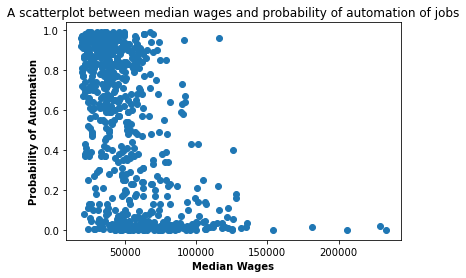

In [137]:
#import the data
jobs = pd.read_csv('job-automation-probability.csv')

#plot
#notice that this is the same command as the line graph, but I replace linestyle with none and create a marker type
plt.plot('median_ann_wage','prob', data=jobs,linestyle='none', marker='o')

# Add xticks on the middle of the group bars
plt.xlabel('Median Wages', fontweight='bold')
plt.ylabel('Probability of Automation', fontweight='bold')
plt.title("A scatterplot between median wages and probability of automation of jobs")
 
# Create legend & Show graphic

plt.show()


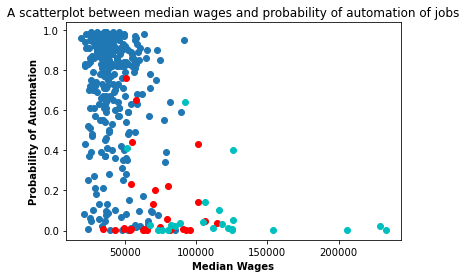

In [151]:
# Adding layers highlighting categorical data
hs = jobs[jobs['education']=='High school diploma or equivalent']
ms = jobs[jobs['education']=='Master\'s degree']
phd = jobs[jobs['education']=='Doctoral or professional degree']

#import the data
jobs = pd.read_csv('job-automation-probability.csv')

#plot
plt.plot('median_ann_wage','prob', data=hs,linestyle='none', marker='o')
plt.plot('median_ann_wage','prob', data=ms,linestyle='none', marker='o', color ='r')
plt.plot('median_ann_wage','prob', data=phd,linestyle='none', marker='o', color ='c')


plt.xlabel('Median Wages', fontweight='bold')
plt.ylabel('Probability of Automation', fontweight='bold')
plt.title("A scatterplot between median wages and probability of automation of jobs")
 
# Create legend & Show graphic

plt.show()


## Histogram

In [156]:
jobs.columns

Index(['_ - rank', '_ - code', 'prob', 'Average annual wage', 'education',
       'occupation', 'short occupation', 'len', 'probability', 'numbEmployed',
       'median_ann_wage', 'employed_may2016', 'average_ann_wage'],
      dtype='object')

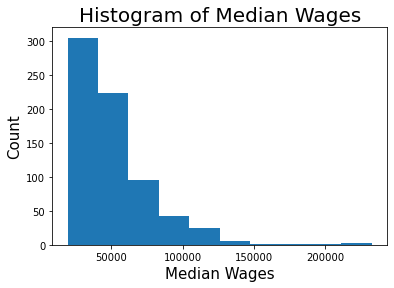

In [162]:
plt.hist(jobs['median_ann_wage'])

plt.xlabel('Median Wages', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("Histogram of Median Wages", fontsize=20)


plt.show()



### Box plots

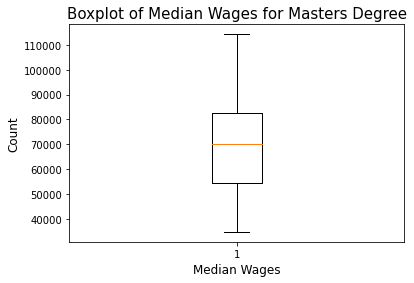

In [172]:

plt.boxplot(ms['median_ann_wage'])

plt.xlabel('Median Wages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Boxplot of Median Wages for Masters Degree", fontsize=15)


plt.show()

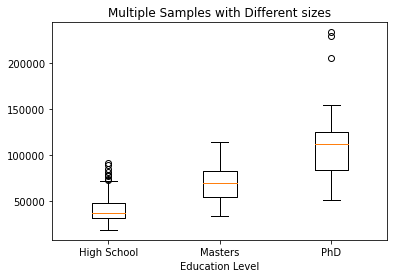

In [180]:
# We can show boxplots of median wages by education type

#create a nested list
data = [hs['median_ann_wage'],ms['median_ann_wage'],phd['median_ann_wage']]

fig, ax = plt.subplots()  #So, here is the new thing (you will use this often)
# You're going to create a figure area and an axis
# This allows you to layer subplot areas ontop of one another

# you can then change specific things about the axis, but you must "set" them for the entire figure
ax.set_title('Multiple Samples with Different sizes')
ax.set_xlabel('Education Level')
ax.boxplot(data,labels=['High School','Masters','PhD'])

plt.show()

### Pie Chart

In [192]:
# Let's calculate  the percent of employed people by education level in our dataset
education_pie = jobs[['numbEmployed','education']].drop_duplicates().groupby('education').sum().reset_index()
tot = education_pie['numbEmployed'].sum()
education_pie['% total'] = education_pie['numbEmployed']/tot


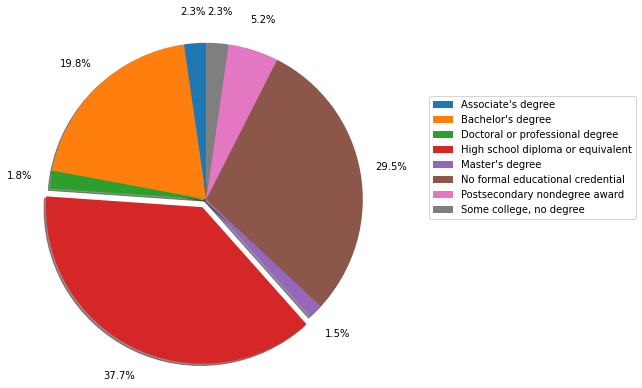

In [250]:
# Make figure and axes
fig, ax1 = plt.subplots()

explode = (0, 0, 0, 0.1, 0,0,0,0)

# A standard pie plot
ax1.pie(education_pie['% total'], labels=education_pie['education'], autopct='%1.1f%%', 
        explode=explode, shadow=True, startangle=90, labeldistance=None, pctdistance=1.2, 
        radius = 1.8)

ax1.legend(bbox_to_anchor=(1.5, 1), loc='upper left' )

plt.show()



In [263]:
walmart[walmart['STRSTATE']=='AR']['county'].nunique()

58

# Breakout Exercise

Use the jobs automation dataset and create:
1. A Histogram of the variable 'probability'
2. A scatter plot of 'Average annual wage' and 'numbEmployed'
3. A pie chart of employment by 'education' group for occupations that begin with the first 2 digits '11' from the variable '_ - code'(this is trickier)

Be sure to include a title, y-axis title, x-axis title, and legend (where appropriate).


In [266]:
#import the data:
jobs = pd.read_csv('job-automation-probability.csv')
jobs.columns

Index(['_ - rank', '_ - code', 'prob', 'Average annual wage', 'education',
       'occupation', 'short occupation', 'len', 'probability', 'numbEmployed',
       'median_ann_wage', 'employed_may2016', 'average_ann_wage'],
      dtype='object')

## Useful Resources:

[Gallery of a various graphing techniques](https://python-graph-gallery.com/)

### Next time - Seaborn and dealing with axes, legends, and other annoying options.